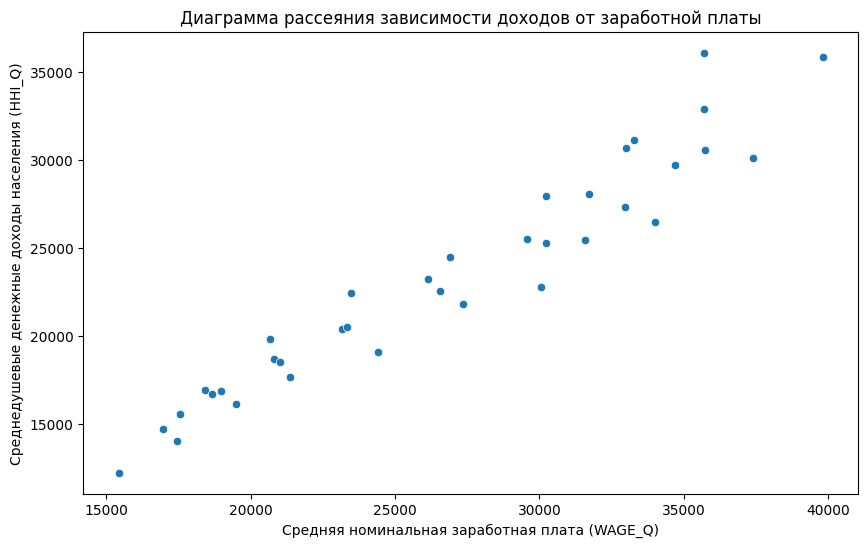

Коэффициент корреляции: 0.9640214957814384
p-значение: 3.8390787316025744e-21


In [2]:
#Task_1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Загрузка данных
file_path = 'КР_17_вариант.xlsx'
data = pd.read_excel(file_path)

# Очистка данных
data['HHI_Q'] = data['Среднедушевые денежные доходы населения'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['WAGE_Q'] = data['Средняя номинальная заработная плата'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['WAGE_Q'], y=data['HHI_Q'])
plt.xlabel('Средняя номинальная заработная плата (WAGE_Q)')
plt.ylabel('Среднедушевые денежные доходы населения (HHI_Q)')
plt.title('Диаграмма рассеяния зависимости доходов от заработной платы')
plt.show()

# Вычисление коэффициента корреляции Пирсона
correlation_coefficient, p_value = pearsonr(data['WAGE_Q'], data['HHI_Q'])
print("Коэффициент корреляции:", correlation_coefficient)
print("p-значение:", p_value)


In [3]:
#Task_2
import statsmodels.api as sm

# Зависимая и независимая переменные
y = data['HHI_Q']
x = data['WAGE_Q']

# Добавляем константу к независимой переменной для выполнения регрессии
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())

# Средняя относительная ошибка аппроксимации
mean_relative_error = (abs((model.predict(X) - y) / y)).mean()
print("Средняя относительная ошибка аппроксимации:", mean_relative_error)


                            OLS Regression Results                            
Dep. Variable:                  HHI_Q   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     447.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           3.84e-21
Time:                        16:59:48   Log-Likelihood:                -317.92
No. Observations:                  36   AIC:                             639.8
Df Residuals:                      34   BIC:                             643.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -294.0279   1151.753     -0.255      0.8

In [4]:
#Task_3
from scipy.stats import shapiro

# Остатки модели
residuals = model.resid

# Тест Шапиро-Уилка
stat, p_value_shapiro = shapiro(residuals)
print("Статистика теста Шапиро-Уилка:", stat)
print("p-значение:", p_value_shapiro)
if p_value_shapiro > 0.05:
    print("Остатки нормально распределены.")
else:
    print("Остатки не являются нормально распределенными.")


Статистика теста Шапиро-Уилка: 0.9717359268667566
p-значение: 0.4748376053377255
Остатки нормально распределены.


Статистика Бреуша-Пагана: 5.927670979192827
p-значение: 0.014904928337146638
Наблюдается гетероскедастичность.


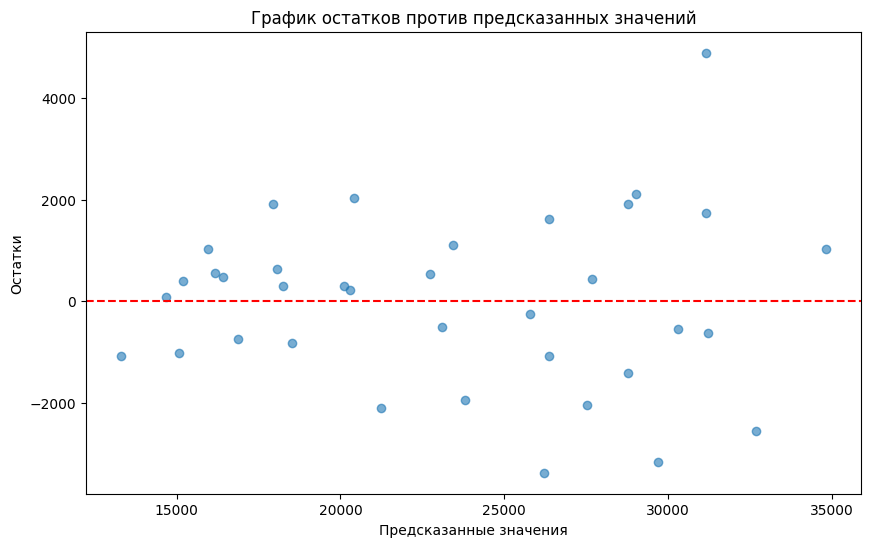

In [5]:
#Task_4
from statsmodels.stats.diagnostic import het_breuschpagan

# Тест Бреуша-Пагана
bp_test = het_breuschpagan(residuals, X)
print("Статистика Бреуша-Пагана:", bp_test[0])
print("p-значение:", bp_test[1])
if bp_test[1] > 0.05:
    print("Гомоскедастичность подтверждается.")
else:
    print("Наблюдается гетероскедастичность.")

# Построение графика остатков против предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков против предсказанных значений")
plt.show()


Точечное прогнозное значение: 24489.014310547384
Доверительный интервал (95%): (np.float64(23900.739641308777), np.float64(25077.28897978599))


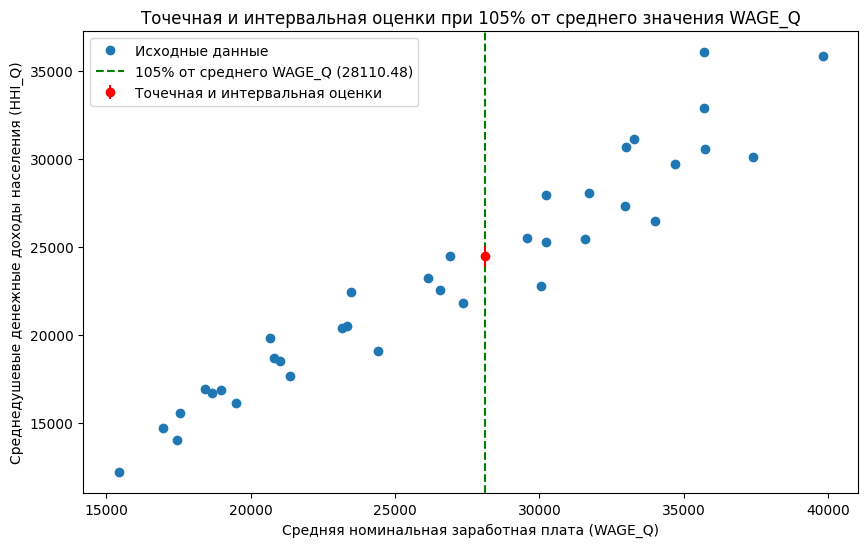

In [6]:
#Task_5
import pandas as pd
import statsmodels.api as sm

# Среднее значение экзогенной переменной
mean_x = x.mean()
new_x_value = 1.05 * mean_x

# Создание DataFrame для предсказания
new_X = pd.DataFrame({'const': [1], 'WAGE_Q': [new_x_value]})

# Прогнозное значение и доверительный интервал
prediction = model.get_prediction(new_X)
prediction_summary = prediction.summary_frame(alpha=0.05)

# Вывод результатов
point_estimate = prediction_summary['mean'][0]
lower_bound = prediction_summary['mean_ci_lower'][0]
upper_bound = prediction_summary['mean_ci_upper'][0]
print("Точечное прогнозное значение:", point_estimate)
print("Доверительный интервал (95%):", (lower_bound, upper_bound))

# Построение графика точечной и интервальной оценки
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Исходные данные')
plt.axvline(new_x_value, color='green', linestyle='--', label=f'105% от среднего WAGE_Q ({new_x_value:.2f})')
plt.errorbar(new_x_value, point_estimate, yerr=[[point_estimate - lower_bound], [upper_bound - point_estimate]], fmt='o', color='red', label='Точечная и интервальная оценки')
plt.xlabel("Средняя номинальная заработная плата (WAGE_Q)")
plt.ylabel("Среднедушевые денежные доходы населения (HHI_Q)")
plt.title("Точечная и интервальная оценки при 105% от среднего значения WAGE_Q")
plt.legend()
plt.show()


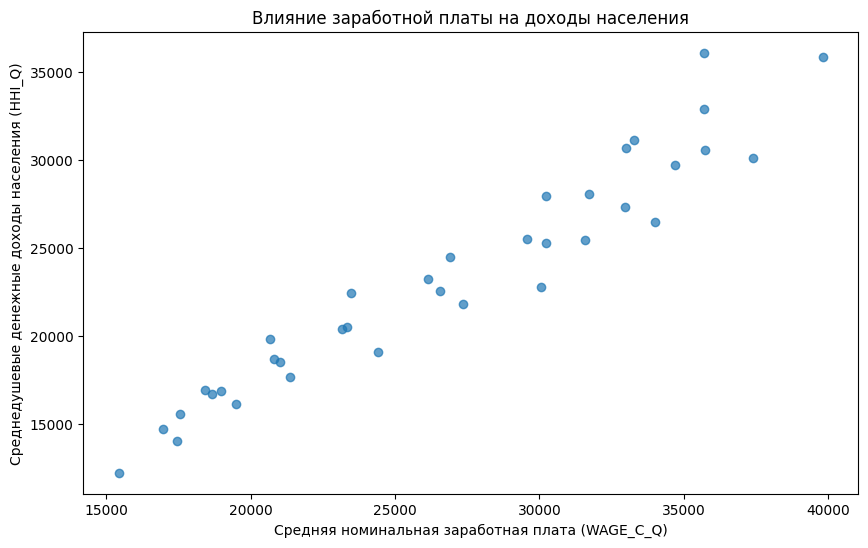

Коэффициент корреляции: 0.9640214957814384
p-значение: 3.8390787316025744e-21
                            OLS Regression Results                            
Dep. Variable:                  HHI_Q   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     447.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           3.84e-21
Time:                        17:19:06   Log-Likelihood:                -317.92
No. Observations:                  36   AIC:                             639.8
Df Residuals:                      34   BIC:                             643.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [8]:
#Task_6
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Загрузка и очистка данных (замените путь к файлу)
file_path = 'КР_17_вариант.xlsx'
data = pd.read_excel(file_path)

# Очистка данных и переименование столбцов для удобства
data['HHI_Q'] = data['Среднедушевые денежные доходы населения'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['WAGE_C_Q'] = data['Средняя номинальная заработная плата'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Зависимая и независимая переменные
y = data['HHI_Q']  # зависимая переменная (доходы населения)
x = data['WAGE_C_Q']  # независимая переменная (заработная плата)

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Средняя номинальная заработная плата (WAGE_C_Q)")
plt.ylabel("Среднедушевые денежные доходы населения (HHI_Q)")
plt.title("Влияние заработной платы на доходы населения")
plt.show()

# Расчет коэффициента корреляции Пирсона
correlation_coefficient, p_value = pearsonr(x, y)
print("Коэффициент корреляции:", correlation_coefficient)
print("p-значение:", p_value)

# Построение модели линейной регрессии
X = sm.add_constant(x)  # добавление константы
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())

# Средняя относительная ошибка аппроксимации
mean_relative_error = (abs((model.predict(X) - y) / y)).mean()
print("Средняя относительная ошибка аппроксимации:", mean_relative_error)
